### This project was my first independent project. This consists of exploratory data analysis, merging data frames, webscraping, transforms, visualizing the data, and a machine learning technique (principal component analysis). The goal of this project was to identify players from the NCAA data sets that would end up as draft picks by identifying key features that would discern NBA talent from collegiate talent. In the Principal Component Analysis I found key features that identify players in a 3 dimensional graph and I plotted those data points red for distinction.

In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [37]:
ncaa2015 = pd.read_excel("2015 Individual Player Stats.xlsx")

In [38]:
ncaa2015.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals FTA,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS
0,Abilene Christian1,1,Parker Wentz,JR,G,Abilene Christian,Southland,27,780,97,...,85,7,51,58,38,43,3,40,58,322
1,Abilene Christian2,2,Austin Cooke,JR,F,Abilene Christian,Southland,27,768,92,...,46,36,128,164,23,14,2,33,73,268
2,Abilene Christian3,3,Jalen Little,JR,G,Abilene Christian,Southland,27,682,25,...,29,5,43,48,91,21,0,44,54,85
3,Abilene Christian4,4,Harrison Hawkins,SR,G,Abilene Christian,Southland,27,655,124,...,65,9,23,32,43,24,3,64,71,353
4,Abilene Christian5,5,LaDarrien Williams,SR,G,Abilene Christian,Southland,27,651,97,...,59,29,85,114,56,27,3,60,61,272


In [39]:
ncaa2016 = pd.read_excel("2016 Individual Player Stats.xlsx")

In [40]:
ncaa2016.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals FTA,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS
0,Abilene Christian1,1,Parker Wentz,SR,G,Abilene Christian,Southland,31,918,87,...,31,5,51,56,27,37,3,27,65,269
1,Abilene Christian2,2,Jaylen Franklin,FR,G,Abilene Christian,Southland,30,883,176,...,206,23,92,115,82,52,4,85,84,486
2,Abilene Christian3,3,Jalen Little,SR,G,Abilene Christian,Southland,26,737,48,...,49,9,68,77,116,33,2,50,67,159
3,Abilene Christian4,4,Jaren Lewis,FR,F,Abilene Christian,Southland,31,673,110,...,73,36,144,180,40,34,18,34,64,292
4,Abilene Christian5,5,Jovan Crnic,JR,G,Abilene Christian,Southland,31,640,71,...,55,8,71,79,78,23,3,67,66,219


In [41]:
ncaa2017 = pd.read_excel("2017 Individual Player Stats.xlsx")

In [42]:
ncaa2017.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals FTA,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS
0,Abilene Christian1,1,Jaren Lewis,SO,G,Abilene Christian,Southland,29,939,148,...,125,39,151,190,61,53,12,75,72,397
1,Abilene Christian2,2,Jaylen Franklin,SO,G,Abilene Christian,Southland,26,896,115,...,108,12,86,98,115,48,8,65,62,282
2,Abilene Christian3,3,Isaiah Tripp,JR,G,Abilene Christian,Southland,29,662,55,...,47,8,34,42,46,16,1,31,69,175
3,Abilene Christian4,4,Drake Green,JR,G,Abilene Christian,Southland,27,648,50,...,9,4,51,55,30,22,6,23,61,153
4,Abilene Christian5,5,Jalone Friday,FR,C,Abilene Christian,Southland,26,563,123,...,91,41,101,142,9,12,34,41,95,357


In [43]:
ncaa2015["year"] = "2015"

In [44]:
ncaa2016["year"] = "2016"

In [45]:
ncaa2017["year"] = "2017"

In [46]:
ncaa2015.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS,year
0,Abilene Christian1,1,Parker Wentz,JR,G,Abilene Christian,Southland,27,780,97,...,7,51,58,38,43,3,40,58,322,2015
1,Abilene Christian2,2,Austin Cooke,JR,F,Abilene Christian,Southland,27,768,92,...,36,128,164,23,14,2,33,73,268,2015
2,Abilene Christian3,3,Jalen Little,JR,G,Abilene Christian,Southland,27,682,25,...,5,43,48,91,21,0,44,54,85,2015
3,Abilene Christian4,4,Harrison Hawkins,SR,G,Abilene Christian,Southland,27,655,124,...,9,23,32,43,24,3,64,71,353,2015
4,Abilene Christian5,5,LaDarrien Williams,SR,G,Abilene Christian,Southland,27,651,97,...,29,85,114,56,27,3,60,61,272,2015


In [47]:
ncaa = pd.concat([ncaa2015, ncaa2016, ncaa2017])

In [48]:
ncaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330 entries, 0 to 4466
Data columns (total 27 columns):
Team + Rank     13330 non-null object
Minutes Rank    13330 non-null int64
Player          13330 non-null object
Class           13295 non-null object
Pos             13329 non-null object
School          13330 non-null object
Conf            13330 non-null object
G               13330 non-null int64
MP              13330 non-null int64
Totals FG       13330 non-null int64
Totals FGA      13330 non-null int64
Totals 2P       13330 non-null int64
Totals 2PA      13330 non-null int64
Totals 3P       13330 non-null int64
Totals 3PA      13330 non-null int64
Totals FT       13330 non-null int64
Totals FTA      13330 non-null int64
Totals ORB      13330 non-null int64
Totals DRB      13330 non-null int64
Totals TRB      13330 non-null int64
Totals AST      13330 non-null int64
Totals STL      13330 non-null int64
Totals BLK      13330 non-null int64
Totals TOV      13330 non-null int6

In [49]:
ncaa.describe()

,Minutes Rank,G,MP,Totals FG,Totals FGA,Totals 2P,Totals 2PA,Totals 3P,Totals 3PA,Totals FT,Totals FTA,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS
count,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000,13330.000000
mean,6.921830,24.262266,487.018530,60.442611,137.201800,43.524006,88.692873,16.918605,48.508927,34.915304,50.042086,21.866692,56.074044,77.940735,31.974269,15.032483,8.335109,30.139835,45.362641,172.719130
std,3.804556,8.705893,332.303125,52.895595,115.933211,42.244091,81.211921,21.690787,57.464477,35.877104,47.893707,22.077375,46.264736,65.017973,35.841751,13.827732,12.230708,24.072803,28.356689,152.672155
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000000,20.000000,181.000000,14.000000,36.000000,9.000000,20.000000,0.000000,2.000000,7.000000,11.000000,5.000000,18.000000,25.000000,5.000000,4.000000,1.000000,10.000000,21.000000,40.000000
50%,7.000000,27.000000,480.000000,48.000000,112.000000,31.000000,66.000000,7.000000,24.000000,23.000000,36.000000,15.000000,48.000000,65.000000,20.000000,12.000000,4.000000,26.000000,47.000000,135.000000
75%,10.000000,31.000000,769.000000,95.000000,215.000000,66.000000,137.000000,27.000000,79.000000,53.000000,76.000000,32.000000,83.000000,114.000000,46.000000,23.000000,11.000000,46.000000,67.000000,271.000000
max,19.000000,46.000000,1278.000000,313.000000,701.000000,262.000000,569.000000,127.000000,340.000000,280.000000,331.000000,173.000000,389.000000,474.000000,296.000000,125.000000,130.000000,148.000000,130.000000,959.000000


In [50]:
ncaa.to_excel("ncaa.xlsx", index = False) 

In [51]:
ncaa2015.columns.values

array(['Team + Rank', 'Minutes Rank', 'Player', 'Class', 'Pos', 'School',
       'Conf', 'G', 'MP', 'Totals FG', 'Totals FGA', 'Totals 2P',
       'Totals 2PA', 'Totals 3P', 'Totals 3PA', 'Totals FT', 'Totals FTA',
       'Totals ORB', 'Totals DRB', 'Totals TRB', 'Totals AST',
       'Totals STL', 'Totals BLK', 'Totals TOV', 'Totals PF', 'Totals PTS',
       'year'], dtype=object)

In [52]:
###cross fitting, overvalidation, linear regression, sci-kit learn

In [53]:
#Make classification variables: year and whether they went into NBA so make an in and out chart.
#Different regions: Classify rounds for draft picks. 1st, 2nd, not drafted at all. What classification is this?
#
#Where are clusters forming? These are formed by a tuple of the factors you're putting in.
#Principal Component Analysis
#All these things go to what you do to separate and spot and define the dots.
#Where are people clustering? Name these clusters.
#With this regions set up, we identify these goals. 

#NEXT STEP: Look up how to set up an SVM. Put in data into it.
#US or International prospects?
#higher % of foreign players getting into the NBA draft?
#convert categories to number values

In [54]:
ncaa2015.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS,year
0,Abilene Christian1,1,Parker Wentz,JR,G,Abilene Christian,Southland,27,780,97,...,7,51,58,38,43,3,40,58,322,2015
1,Abilene Christian2,2,Austin Cooke,JR,F,Abilene Christian,Southland,27,768,92,...,36,128,164,23,14,2,33,73,268,2015
2,Abilene Christian3,3,Jalen Little,JR,G,Abilene Christian,Southland,27,682,25,...,5,43,48,91,21,0,44,54,85,2015
3,Abilene Christian4,4,Harrison Hawkins,SR,G,Abilene Christian,Southland,27,655,124,...,9,23,32,43,24,3,64,71,353,2015
4,Abilene Christian5,5,LaDarrien Williams,SR,G,Abilene Christian,Southland,27,651,97,...,29,85,114,56,27,3,60,61,272,2015


In [55]:
ncaa2015['Class'] = ncaa2015['Class'].astype('category')
ncaa2015['Pos'] = ncaa2015['Pos'].astype('category')
ncaa2015['Conf'] = ncaa2015['Conf'].astype('category')

In [56]:
ncaa2015['Conf'].unique()

[Southland, MWC, MAC, SEC, SWAC, ..., Summit, Big Sky, A-Sun, Big Ten, Ind]
Length: 33
Categories (33, object): [Southland, MWC, MAC, SEC, ..., Big Sky, A-Sun, Big Ten, Ind]

In [57]:
#! conda install -y -q html5lib
import html5lib
nba2015 = pd.read_html("http://www.nbadraft.net/nba_final_draft/2015")

In [58]:
a = nba2015[0].iloc[:,:8].copy()
b = nba2015[0].iloc[:,8:].copy()
a['round'] = 1
b['round'] = 2
b.columns = a.columns

c = a.append(b)
#c.set_index('#',inplace=True)
c

,#,Team,Player,H,W,P,School,C,round
0,1,Minnesota,Karl-Anthony Towns,7-0,250,C,Kentucky,Fr.,1
1,2,LA Lakers,D'Angelo Russell,6-4,195,PG/SG,Ohio State,Fr.,1
2,3,Philadelphia,Jahlil Okafor,6-11,270,C,Duke,Fr.,1
3,4,*New York,Kristaps Porzingis,7-1,230,PF,Latvia,Intl.,1
4,5,Orlando,Mario Hezonja,6-8,215,SG/SF,Croatia,Intl.,1
5,6,Sacramento,Willie Cauley-Stein,7-0,242,C,Kentucky,Jr.,1
6,7,Denver,Emmanuel Mudiay,6-5,200,PG,Congo,Intl.,1
7,8,Detroit,Stanley Johnson,6-6,242,SF,Arizona,Fr.,1
8,9,Charlotte,Frank Kaminsky,7-1,230,C,Wisconsin,Sr.,1
9,10,Miami,Justise Winslow,6-6,222,SG/SF,Duke,Fr.,1


In [59]:
ncaa2015.head()

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS,year
0,Abilene Christian1,1,Parker Wentz,JR,G,Abilene Christian,Southland,27,780,97,...,7,51,58,38,43,3,40,58,322,2015
1,Abilene Christian2,2,Austin Cooke,JR,F,Abilene Christian,Southland,27,768,92,...,36,128,164,23,14,2,33,73,268,2015
2,Abilene Christian3,3,Jalen Little,JR,G,Abilene Christian,Southland,27,682,25,...,5,43,48,91,21,0,44,54,85,2015
3,Abilene Christian4,4,Harrison Hawkins,SR,G,Abilene Christian,Southland,27,655,124,...,9,23,32,43,24,3,64,71,353,2015
4,Abilene Christian5,5,LaDarrien Williams,SR,G,Abilene Christian,Southland,27,651,97,...,29,85,114,56,27,3,60,61,272,2015


In [60]:
c.head()

,#,Team,Player,H,W,P,School,C,round
0,1,Minnesota,Karl-Anthony Towns,7-0,250,C,Kentucky,Fr.,1
1,2,LA Lakers,D'Angelo Russell,6-4,195,PG/SG,Ohio State,Fr.,1
2,3,Philadelphia,Jahlil Okafor,6-11,270,C,Duke,Fr.,1
3,4,*New York,Kristaps Porzingis,7-1,230,PF,Latvia,Intl.,1
4,5,Orlando,Mario Hezonja,6-8,215,SG/SF,Croatia,Intl.,1


In [61]:
ncaadraft2015 = pd.merge(ncaa2015, c, on=['Player', 'School'], how='outer', indicator='Found')

In [62]:
ncaadraft2015[ncaadraft2015['Found']=='both']

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals PTS,year,#,Team,H,W,P,C,round,Found
149,Arizona2,2.0,Stanley Johnson,FR,F,Arizona,Pac-12,28.0,793.0,130.0,...,398.0,2015,8.0,Detroit,6-6,242.0,SF,Fr.,1.0,both
150,Arizona3,3.0,Rondae Hollis-Jefferson,SO,F,Arizona,Pac-12,28.0,785.0,102.0,...,312.0,2015,23.0,*Brooklyn,6-7,210.0,SF,So.,1.0,both
175,Arkansas2,2.0,Bobby Portis,SO,F,Arkansas,SEC,28.0,818.0,203.0,...,493.0,2015,22.0,Chicago,6-11,245.0,PF,So.,1.0,both
348,Boston College1,1.0,Olivier Hanlan,JR,G,Boston College,ACC,27.0,1020.0,192.0,...,524.0,2015,42.0,Utah,6-4,185.0,PG/SG,Jr.,2.0,both
1002,Duke2,2.0,Tyus Jones,FR,G,Duke,ACC,28.0,918.0,92.0,...,323.0,2015,24.0,*Minnesota,6-1,185.0,PG,Fr.,1.0,both
1003,Duke3,3.0,Jahlil Okafor,FR,C,Duke,ACC,27.0,840.0,206.0,...,496.0,2015,3.0,Philadelphia,6-11,270.0,C,Fr.,1.0,both
1004,Duke4,4.0,Justise Winslow,FR,F,Duke,ACC,28.0,806.0,116.0,...,335.0,2015,10.0,Miami,6-6,222.0,SG/SF,Fr.,1.0,both
1091,Eastern Washington1,1.0,Tyler Harvey,JR,G,Eastern Washington,Big Sky,25.0,904.0,174.0,...,567.0,2015,51.0,*Orlando,6-4,180.0,SG,Jr.,2.0,both
1675,Iowa1,1.0,Aaron White,SR,F,Iowa,Big Ten,28.0,847.0,127.0,...,425.0,2015,49.0,Washington,6-9,220.0,SF/PF,Sr.,2.0,both
1758,Kansas4,4.0,Kelly Oubre,FR,G,Kansas,Big 12,28.0,552.0,83.0,...,240.0,2015,15.0,*Washington,6-7,205.0,SF,Fr.,1.0,both


In [63]:
ncaadraft2015[(ncaadraft2015['Found']=='right_only') & (ncaadraft2015.C !='Intl.')]

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals PTS,year,#,Team,H,W,P,C,round,Found
4435,NaN,NaN,Cameron Payne,NaN,NaN,Murray St.,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,Oklahoma Cty,6-2,185.0,PG,So.,1.0,right_only
4436,NaN,NaN,Rashad Vaughn,NaN,NaN,UNLV,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,Milwaukee,6-5,200.0,SG,Fr.,1.0,right_only
4437,NaN,NaN,Jarell Martin,NaN,NaN,LSU,NaN,NaN,NaN,NaN,...,NaN,NaN,25.0,Memphis,6-9,240.0,PF,So.,1.0,right_only
4439,NaN,NaN,Larry Nance Jr.,NaN,NaN,Wyoming,NaN,NaN,NaN,NaN,...,NaN,NaN,27.0,*LA Lakers,6-9,230.0,PF,Sr.,1.0,right_only
4440,NaN,NaN,RJ Hunter,NaN,NaN,Georgia St.,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,*Boston,6-6,185.0,SG,Jr.,1.0,right_only
4442,NaN,NaN,Jordan Mickey,NaN,NaN,LSU,NaN,NaN,NaN,NaN,...,NaN,NaN,33.0,*Boston,6-8,240.0,PF,So.,2.0,right_only
4444,NaN,NaN,Richaun Holmes,NaN,NaN,Bowling Green,NaN,NaN,NaN,NaN,...,NaN,NaN,37.0,*Philadelphia,6-9,245.0,PF,Sr.,2.0,right_only
4446,NaN,NaN,Marcus Thornton WM,NaN,NaN,William & Mary,NaN,NaN,NaN,NaN,...,NaN,NaN,45.0,Boston,6-3,180.0,PG/SG,Sr.,2.0,right_only
4450,NaN,NaN,Sir'Dominic Pointer,NaN,NaN,St. Johns,NaN,NaN,NaN,NaN,...,NaN,NaN,53.0,*Cleveland,6-6,190.0,SF,Sr.,2.0,right_only
4452,NaN,NaN,Branden Dawson,NaN,NaN,Michigan St.,NaN,NaN,NaN,NaN,...,NaN,NaN,56.0,*LA Clippers,6-7,230.0,SF/PF,Sr.,2.0,right_only


In [64]:
ncaa2015[ncaa2015.Player.str.endswith('Pointer')]

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals ORB,Totals DRB,Totals TRB,Totals AST,Totals STL,Totals BLK,Totals TOV,Totals PF,Totals PTS,year
3687,St. John's (NY)3,3,Sir'Dominic Pointer,SR,G-F,St. John's (NY),Big East,28,962,148,...,56,156,212,81,57,72,54,86,382,2015


In [65]:
#c.to_excel('nba2015.xlsx')

In [66]:
d = pd.read_excel('nba2015.xlsx')
ncaadraft2015 = pd.merge(ncaa2015, d, on=['Player', 'School'], how='outer', indicator='Found')

In [67]:
ncaadraft2015[(ncaadraft2015['Found']=='right_only') & (ncaadraft2015.C !='Intl.')]

,Team + Rank,Minutes Rank,Player,Class,Pos,School,Conf,G,MP,Totals FG,...,Totals PTS,year,#,Team,H,W,P,C,round,Found
4435,NaN,NaN,Cameron Payne,NaN,NaN,Murray St.,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,Oklahoma Cty,6-2,185.0,PG,So.,1.0,right_only
4436,NaN,NaN,Rashad Vaughn,NaN,NaN,UNLV,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,Milwaukee,6-5,200.0,SG,Fr.,1.0,right_only
4437,NaN,NaN,Jarell Martin,NaN,NaN,LSU,NaN,NaN,NaN,NaN,...,NaN,NaN,25.0,Memphis,6-9,240.0,PF,So.,1.0,right_only
4439,NaN,NaN,Larry Nance Jr.,NaN,NaN,Wyoming,NaN,NaN,NaN,NaN,...,NaN,NaN,27.0,*LA Lakers,6-9,230.0,PF,Sr.,1.0,right_only
4440,NaN,NaN,RJ Hunter,NaN,NaN,Georgia St.,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,*Boston,6-6,185.0,SG,Jr.,1.0,right_only
4442,NaN,NaN,Jordan Mickey,NaN,NaN,LSU,NaN,NaN,NaN,NaN,...,NaN,NaN,33.0,*Boston,6-8,240.0,PF,So.,2.0,right_only
4444,NaN,NaN,Richaun Holmes,NaN,NaN,Bowling Green,NaN,NaN,NaN,NaN,...,NaN,NaN,37.0,*Philadelphia,6-9,245.0,PF,Sr.,2.0,right_only
4446,NaN,NaN,Marcus Thornton WM,NaN,NaN,William & Mary,NaN,NaN,NaN,NaN,...,NaN,NaN,45.0,Boston,6-3,180.0,PG/SG,Sr.,2.0,right_only
4450,NaN,NaN,Sir'Dominic Pointer,NaN,NaN,St. Johns,NaN,NaN,NaN,NaN,...,NaN,NaN,53.0,*Cleveland,6-6,190.0,SF,Sr.,2.0,right_only


In [68]:
from sklearn.decomposition import PCA
NBA_PCA = PCA(n_components=12, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [70]:
[(c, type(ncaadraft2015[c][0])) for c in ncaadraft2015.columns]


[('Team + Rank', str),
 ('Minutes Rank', numpy.float64),
 ('Player', str),
 ('Class', str),
 ('Pos', str),
 ('School', str),
 ('Conf', str),
 ('G', numpy.float64),
 ('MP', numpy.float64),
 ('Totals FG', numpy.float64),
 ('Totals FGA', numpy.float64),
 ('Totals 2P', numpy.float64),
 ('Totals 2PA', numpy.float64),
 ('Totals 3P', numpy.float64),
 ('Totals 3PA', numpy.float64),
 ('Totals FT', numpy.float64),
 ('Totals FTA', numpy.float64),
 ('Totals ORB', numpy.float64),
 ('Totals DRB', numpy.float64),
 ('Totals TRB', numpy.float64),
 ('Totals AST', numpy.float64),
 ('Totals STL', numpy.float64),
 ('Totals BLK', numpy.float64),
 ('Totals TOV', numpy.float64),
 ('Totals PF', numpy.float64),
 ('Totals PTS', numpy.float64),
 ('year', str),
 ('#', numpy.float64),
 ('Team', float),
 ('H', float),
 ('W', numpy.float64),
 ('P', float),
 ('C', float),
 ('round', numpy.float64),
 ('Found', str)]

In [71]:
y = ncaadraft2015["round"]

In [72]:
X = ncaadraft2015[["G", 
                   "Totals FT", "MP", "Totals FG", "Totals FGA", "Totals 2PA", "Totals 3P", "Totals 3PA", "Totals PF", "Totals FT", "Totals TOV", "Totals BLK"]]

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 12 columns):
G             4432 non-null float64
Totals FT     4432 non-null float64
MP            4432 non-null float64
Totals FG     4432 non-null float64
Totals FGA    4432 non-null float64
Totals 2PA    4432 non-null float64
Totals 3P     4432 non-null float64
Totals 3PA    4432 non-null float64
Totals PF     4432 non-null float64
Totals FT     4432 non-null float64
Totals TOV    4432 non-null float64
Totals BLK    4432 non-null float64
dtypes: float64(12)
memory usage: 612.5 KB


In [74]:
NBA_PCA.fit(X.fillna(0))

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
NBA_PCA.score(X.fillna(0), y.fillna(0))

-15.432924581292502

In [76]:
NBA_PCA.score_samples(X.fillna(0))

array([-18.41291705, -17.31809269, -16.24035275, ..., -16.13573713,
       -16.13573713, -16.13573713])

In [77]:
PCA2 = PCA(n_components = 2)

In [78]:
PCA2.fit(X.fillna(0))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [79]:
X2 = PCA2.fit(X.fillna(0)).transform(X.fillna(0))

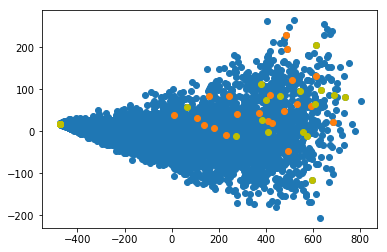

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X2[y==1,0],X2[y==1,1])
plt.scatter(X2[y==2,0],X2[y==2,1], color = 'y')

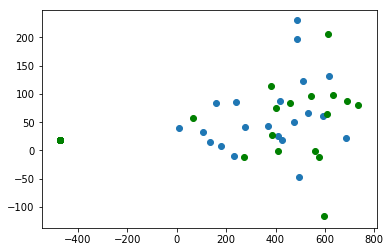

In [81]:
plt.scatter(X2[y==1,0],X2[y==1,1])
plt.scatter(X2[y==2,0],X2[y==2,1], color = 'g')

In [82]:
PCA2.components_.shape

(2, 12)

In [83]:
PCA2.components_

array([[ 0.01810339,  0.07900715,  0.91436761,  0.12770712,  0.2859286 ,
         0.18548448,  0.03653402,  0.10044412,  0.06095739,  0.07900715,
         0.05785737,  0.01280984],
       [-0.02141211,  0.20188979, -0.29997777,  0.25576466,  0.38526974,
         0.70050338, -0.12157717, -0.31523364,  0.02586588,  0.20188979,
         0.06358627,  0.06794895]])

In [84]:
X.columns

Index(['G', 'Totals FT', 'MP', 'Totals FG', 'Totals FGA', 'Totals 2PA',
       'Totals 3P', 'Totals 3PA', 'Totals PF', 'Totals FT', 'Totals TOV',
       'Totals BLK'],
      dtype='object')

In [85]:
PCA3 = PCA(n_components = 3)

In [86]:
X3 = PCA3.fit(X.fillna(0)).transform(X.fillna(0))

In [87]:
X3

array([[ 365.90099956,  -56.48611856,   56.79248452],
       [ 339.73939064,  -67.99349321,   20.51001516],
       [ 200.32472025, -109.90129996,  -87.41819176],
       ..., 
       [-474.51576903,   18.00355954,   20.23131023],
       [-474.51576903,   18.00355954,   20.23131023],
       [-474.51576903,   18.00355954,   20.23131023]])

In [88]:
from mpl_toolkits.mplot3d import Axes3D

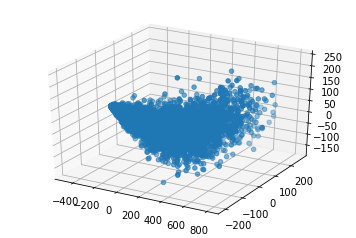

In [89]:
fig = plt.figure()
Ax = fig.add_subplot(111, projection = "3d")
Ax.scatter(X3[:,0], X3[:,1], X3[:,2])

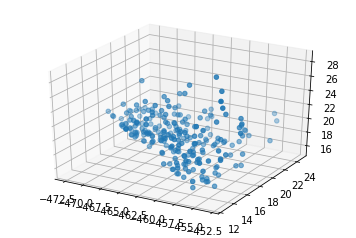

In [90]:
fig = plt.figure()
Ax = fig.add_subplot(111, projection = "3d")
Ax.scatter(X3[X["MP"] < 20,0], X3[X["MP"] < 20,1], X3[X["MP"] < 20,2])

In [91]:
FR = ncaadraft2015.loc[ncaadraft2015["round"]==1,["G", "Totals FT", "MP", "Totals FG", "Totals FGA", "Totals 2PA", "Totals 3P", "Totals 3PA", "Totals PF", "Totals FT", "Totals TOV", "Totals BLK"]]

In [92]:
FR

,G,Totals FT,MP,Totals FG,Totals FGA,Totals 2PA,Totals 3P,Totals 3PA,Totals PF,Totals FT,Totals TOV,Totals BLK
149,28.0,112.0,793.0,130.0,277.0,203.0,26.0,74.0,73.0,112.0,67.0,9.0
150,28.0,103.0,785.0,102.0,192.0,171.0,5.0,21.0,69.0,103.0,49.0,26.0
175,28.0,77.0,818.0,203.0,360.0,339.0,10.0,21.0,59.0,77.0,38.0,44.0
1002,28.0,104.0,918.0,92.0,218.0,128.0,35.0,90.0,33.0,104.0,55.0,1.0
1003,27.0,84.0,840.0,206.0,310.0,310.0,0.0,0.0,60.0,84.0,73.0,39.0
1004,28.0,71.0,806.0,116.0,253.0,169.0,32.0,84.0,79.0,71.0,48.0,20.0
1758,28.0,44.0,552.0,83.0,187.0,110.0,30.0,77.0,48.0,44.0,28.0,7.0
1808,28.0,52.0,706.0,102.0,168.0,168.0,0.0,0.0,55.0,52.0,36.0,43.0
1810,27.0,43.0,584.0,105.0,214.0,108.0,48.0,106.0,38.0,43.0,30.0,1.0
1812,28.0,71.0,569.0,94.0,170.0,162.0,2.0,8.0,79.0,71.0,38.0,66.0


In [93]:
FR2 = PCA2.fit(FR.dropna()).transform(FR.dropna())

In [94]:
FR3 = PCA3.fit(FR.dropna()).transform(FR.dropna())

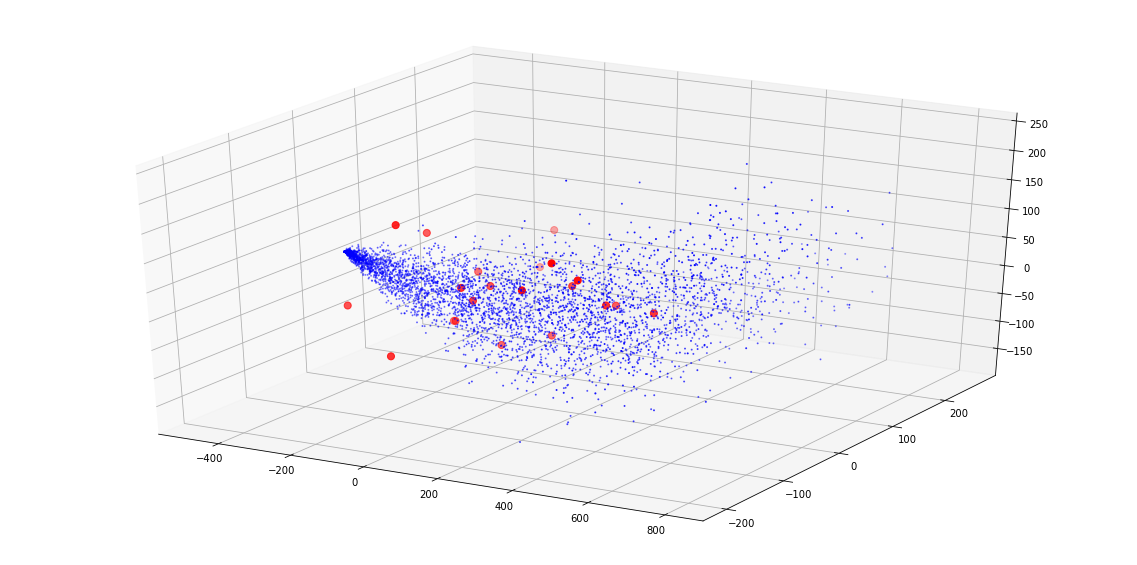

In [95]:
fig = plt.figure(figsize=(20,10))
Ax = fig.add_subplot(111, projection = "3d")
Ax.scatter(FR3[:,0], FR3[:,1], FR3[:,2], color='r', s=50)
Ax.scatter(X3[:,0], X3[:,1], X3[:,2], color='b', s=1)

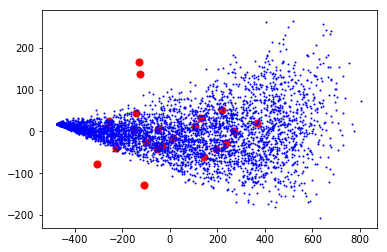

In [96]:
plt.scatter(FR2[:,0], FR2[:,1], color='r', s=50)
plt.scatter(X2[:,0], X2[:,1], color='b', s=1)

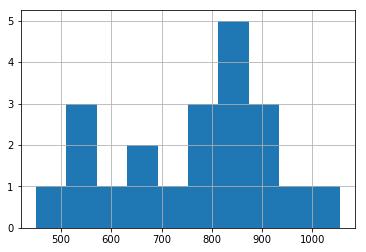

In [97]:
X.loc[y==1, "MP"].hist()

(0, 10)

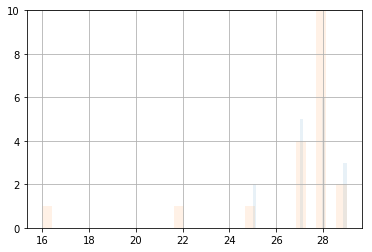

In [98]:
X.loc[y==2, "G"].hist(alpha=0.1, bins=30)
X.loc[y==1, "G"].hist(alpha=0.1, bins=30)
#X["G"].hist(alpha=0.05, bins = 30)
#plt.xlim(300,1000)
plt.ylim(0,10)

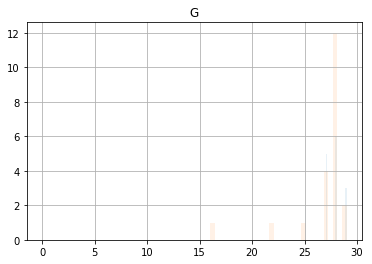

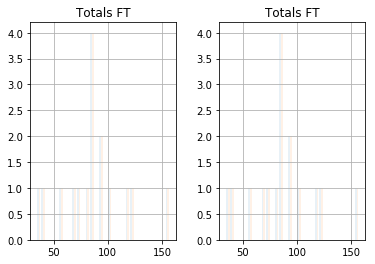

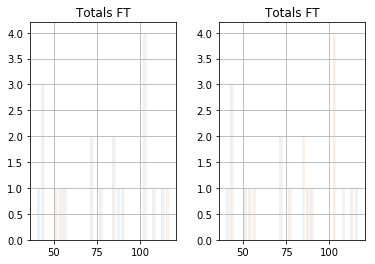

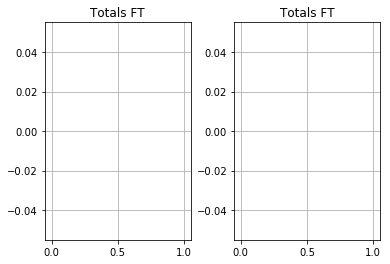

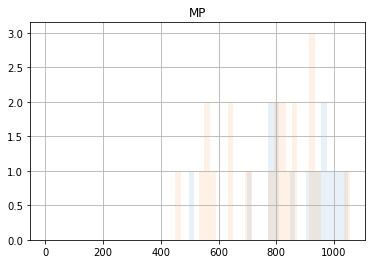

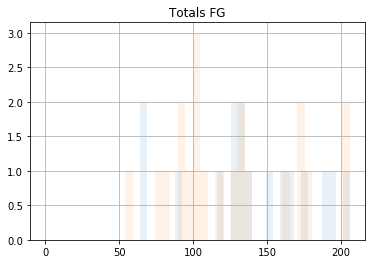

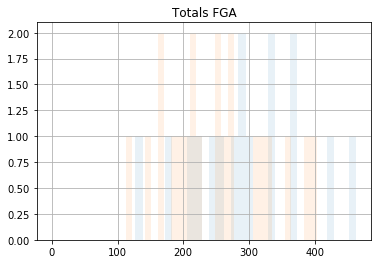

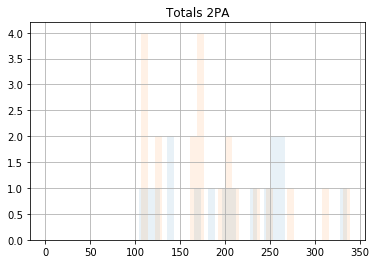

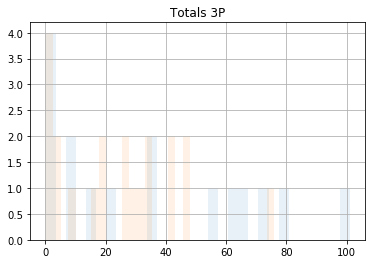

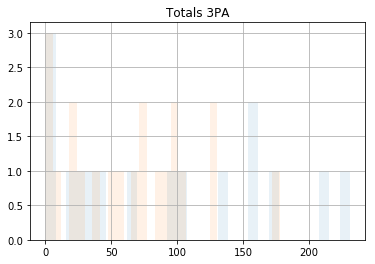

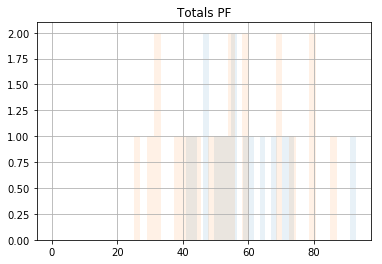

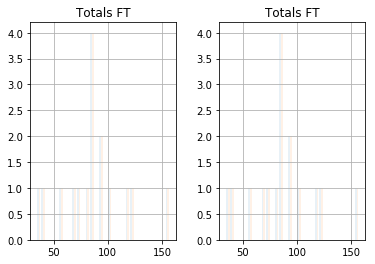

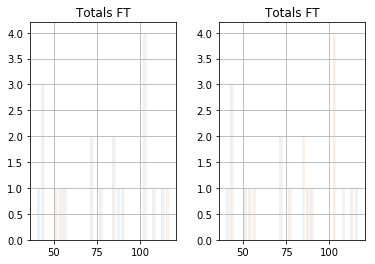

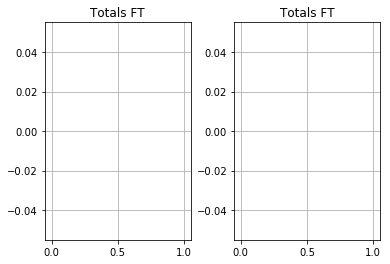

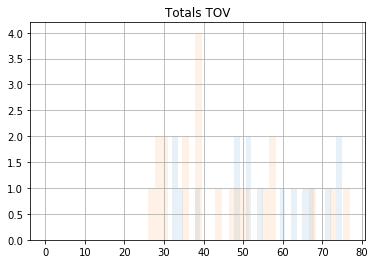

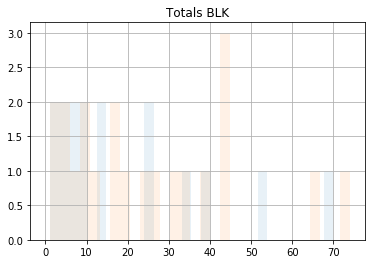

In [99]:
for c in X.columns:
    X.loc[y==2, c].hist(alpha=0.1, bins=30)
    X.loc[y==1, c].hist(alpha=0.1, bins=30)
    X.loc[y==np.nan, c].hist(alpha=0.05, bins = 30)
    #plt.xlim(300,1000)
    #plt.ylim(0,10)
    plt.title(c)
    plt.show()